<a href="https://colab.research.google.com/github/fleminjohnson/Classification-of-53-Cards/blob/main/Card_Classification_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!unzip /content/drive/MyDrive/Colab_Notebooks/Data/cards_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: cards_data/four of spades/010.jpg  
  inflating: __MACOSX/cards_data/four of spades/._010.jpg  
  inflating: cards_data/four of spades/038.jpg  
  inflating: __MACOSX/cards_data/four of spades/._038.jpg  
  inflating: cards_data/four of spades/039.jpg  
  inflating: __MACOSX/cards_data/four of spades/._039.jpg  
  inflating: cards_data/four of spades/011.jpg  
  inflating: __MACOSX/cards_data/four of spades/._011.jpg  
  inflating: cards_data/four of spades/005.jpg  
  inflating: __MACOSX/cards_data/four of spades/._005.jpg  
  inflating: cards_data/four of spades/013.jpg  
  inflating: __MACOSX/cards_data/four of spades/._013.jpg  
  inflating: cards_data/four of spades/007.jpg  
  inflating: __MACOSX/cards_data/four of spades/._007.jpg  
  inflating: cards_data/four of spades/006.jpg  
  inflating: __MACOSX/cards_data/four of spades/._006.jpg  
  inflating: cards_data/four of spades/012.jpg  
  inflating: __MACOSX/cards_

In [18]:
!rm -rf /content/__MACOSX

In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, Input, Conv2D, MaxPooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [20]:
from tensorflow.keras.models import Model

In [21]:
# Define input layer
inputs = Input(shape=(224, 224, 3))

# First convolutional layer
conv1 = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=2, strides=2)(conv1)

# Second convolutional layer
conv2 = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=2, strides=2)(conv2)

# Fully connected layers
flatten = Flatten()(pool2)
dense1 = Dense(256, activation='relu')(flatten)
dropout = Dropout(0.7)(dense1)  # 50% dropout rate
output = Dense(53, activation = 'softmax')(dropout)  # No activation for logits output

model = Model(inputs=inputs, outputs=output)

In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
#for layers in base_model.layers:
#  layers.trainable = False

In [24]:
batch_size = 32

In [25]:
#import os
#os.listdir('/content/cards_data')

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
data_dir = '/content/cards_data'

In [28]:
train_gen = ImageDataGenerator(
    rescale = 1/225,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.3
)

val_gen = ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.3
)

In [29]:
train_gen = train_gen.flow_from_directory(
    data_dir,
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_gen = val_gen.flow_from_directory(
    data_dir,
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation',
)

Found 5361 images belonging to 53 classes.
Found 2263 images belonging to 53 classes.


In [30]:
model.fit(
    train_gen,
    validation_data = validation_gen,
    epochs = 80
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
168/168 ━━━━━━━━━━━━━━━━━━━━ 92s 487ms/step - accuracy: 0.0461 - loss: 6.0394 - val_accuracy: 0.2939 - val_loss: 2.6685
Epoch 2/80
168/168 ━━━━━━━━━━━━━━━━━━━━ 75s 445ms/step - accuracy: 0.1827 - loss: 3.2344 - val_accuracy: 0.3853 - val_loss: 2.2262
Epoch 3/80
168/168 ━━━━━━━━━━━━━━━━━━━━ 79s 429ms/step - accuracy: 0.2290 - loss: 2.8774 - val_accuracy: 0.4684 - val_loss: 1.9320
Epoch 4/80
168/168 ━━━━━━━━━━━━━━━━━━━━ 82s 431ms/step - accuracy: 0.2875 - loss: 2.6594 - val_accuracy: 0.4980 - val_loss: 1.9753
Epoch 5/80
168/168 ━━━━━━━━━━━━━━━━━━━━ 71s 424ms/step - accuracy: 0.3145 - loss: 2.5581 - val_accuracy: 0.5431 - val_loss: 1.7194
Epoch 6/80
168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 438ms/step - accuracy: 0.3564 - loss: 2.4026 - val_accuracy: 0.5365 - val_loss: 1.6498
Epoch 7/80
168/168 ━━━━━━━━━━━━━━━━━━━━ 74s 439ms/step - accuracy: 0.3707 - loss: 2.3290 - val_accuracy: 0.5784 - val_loss: 1.5563
Epoch 8/80
168/168 ━━━━━━━━━━━━━━━━━━━━ 72s 427ms/step - accuracy: 0.3944 - loss: 2

In [31]:
model.evaluate(validation_gen)

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7550 - loss: 1.0821


[1.1030477285385132, 0.7525408864021301]

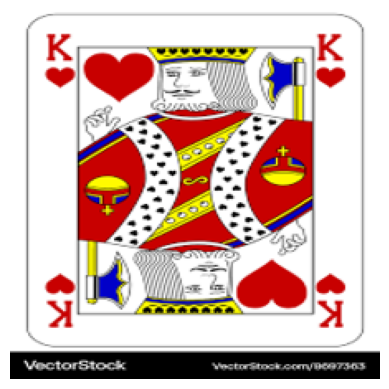

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Class: king of hearts


In [70]:
import numpy as np
import requests
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# URL of the image
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJ3Y2paODwMwEiVbkCnrUaW4nwAc1Wmmg27A&s'  # image URL

# Download the image from the URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))  # Open the image directly from the response

# Convert grayscale image to RGB (if necessary)
if img.mode != 'RGB':
    img = img.convert('RGB')  # Convert to RGB

# Resize the image to match the model's input size
img = img.resize((224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale (same as during training)

# Make predictions
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the class

# Decode the predicted class index to a label
class_labels = list(train_gen.class_indices.keys())  # Get class labels from the generator
predicted_class_label = class_labels[predicted_class_index]  # Map index to label

# Display the result
print(f"Predicted Class: {predicted_class_label}")